##Import libraries

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


##Make data

In [ ]:
x,y=make_classification(n_samples=5000 ,n_features=10,
                        n_classes=3,
                        n_clusters_per_class=1)

##Training and testing the data

In [ ]:
xtrain ,xtest ,ytrain,ytest=train_test_split(x,y,test_size=0.15)

##Applying linear svc

In [ ]:
lsvc=LinearSVC(verbose=0)
print(lsvc)

LinearSVC(C=1.0,class_weight=None,dual=True,fit_intercept=True,
intercept_scaling=1,loss='squared_hinge',max_iter=1000,
multi_class='ovr',penalty='12',random_state=None,tol=0.0001,verbose=0)

LinearSVC()

LinearSVC()


LinearSVC()

In [ ]:
lsvc.fit(xtrain,ytrain)
score=lsvc.score(xtrain,ytrain)
print("Score: ",score)

Score:  0.9131764705882353


In [ ]:
cv_scores=cross_val_score(lsvc,xtrain,ytrain,cv=10)
print("CV average score: %.2f"%cv_scores.mean())

CV average score: 0.91


In [ ]:
ypred=lsvc.predict(xtest)

cm=confusion_matrix(ytest,ypred)
print(cm)

[[238   2   1]
 [ 17 199  35]
 [ 10  21 227]]


In [ ]:
cr=classification_report(ytest,ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       241
           1       0.90      0.79      0.84       251
           2       0.86      0.88      0.87       258

    accuracy                           0.89       750
   macro avg       0.89      0.89      0.88       750
weighted avg       0.89      0.89      0.88       750



SVM BASICS

In [ ]:
from __future__ import division,print_function
import numpy as np
from sklearn import datasets,svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
def evaluate_on_test_data(model=None):
  prediction=model.predict(X_test)
  correct_classifications=0
  for i in range(len(y_test)):
    if prediction[i]==y_test[i]:
      correct_classifications +=1
  accuracy=100*correct_classifications/len(y_test) #Accuracy as a percentage
  return accuracy

##Fitting data into different kernels

In [ ]:
kernels=('linear','poly','rbf')
accuracies=[]
for index,kernel in enumerate(kernels):
  model=svm.SVC(kernel=kernel)
  model.fit(X_train,y_train)
  acc=evaluate_on_test_data(model)
  accuracies.append(acc)
  print("{} % accuracy obtained with kernel ={}".format(acc,kernel))

84.21052631578948 % accuracy obtained with kernel =linear
76.3157894736842 % accuracy obtained with kernel =poly
84.21052631578948 % accuracy obtained with kernel =rbf


##Training the model

In [ ]:
svc=svm.SVC(kernel='linear').fit(X_train,y_train)
rbf_svc=svm.SVC(kernel='rbf',gamma=0.7).fit(X_train,y_train)
poly_svc=svm.SVC(kernel='poly',degree=3).fit(X_train,y_train)

In [ ]:
#Train svc with different kernels
h=.02   #Step size in mesh
x_min,x_max=X[:, 0].min()-1,X[:,0].max()+1
y_min,y_max=X[:, 1].min()-1,X[:,1].max()+1
xx, yy =np.meshgrid(np.arange(x_min,x_max,h),
                  np.arange(y_min,y_max,h))

##Plotting the graph to show the kernels

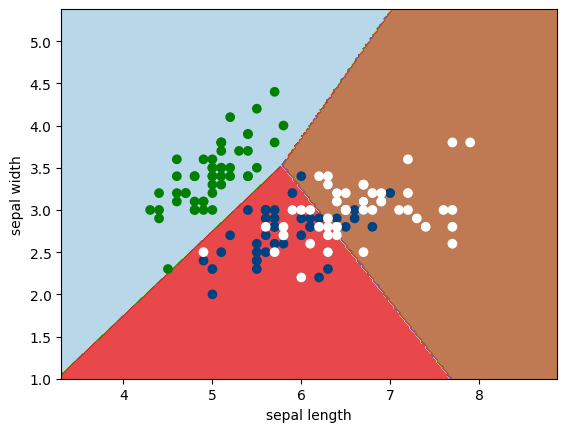

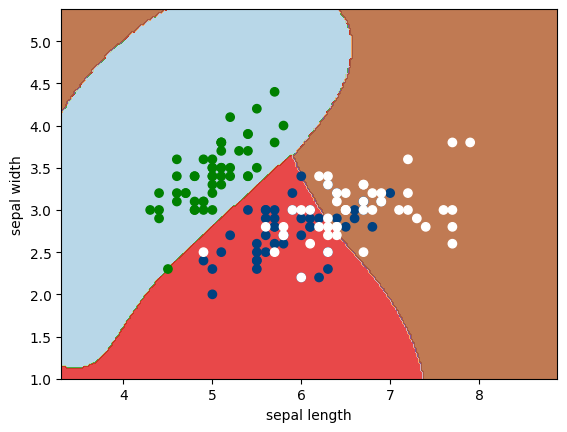

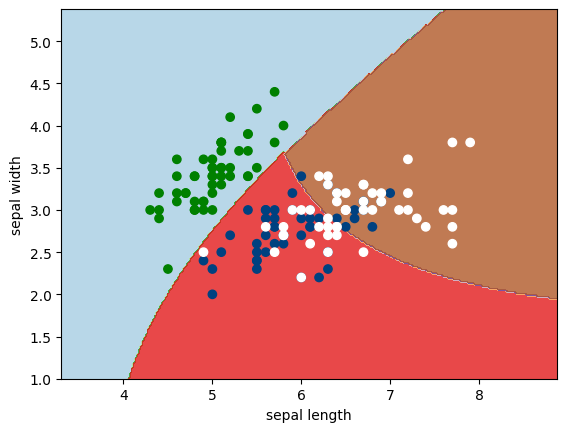

In [ ]:
title=['SVC witrh linear kernel',
      'SVC with RBF kernel',
      'SVC with polynomial(degree 3)kernel']


for i,clf in enumerate((svc,rbf_svc,poly_svc)):
  plt.figure(i)

  Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
  #put result into color plot
  Z=Z.reshape(xx.shape)
  plt.contourf(xx,yy,Z,cmap=plt.cm.Paired,alpha=0.8)
  #plot also the training points
  plt.scatter(X[: ,0],X[: ,1],c=y,cmap=plt.cm.ocean)
  plt.xlabel('sepal length')
  plt.ylabel('sepal width')
  '''plt.xlim(xx.min(),xx.max())
  plt.xlim(yy.min(),yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(title[i])'''


plt.show()

##OpenML data

In [ ]:
import warnings
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split

#load data from https://www.openml.org/d/554
X,y=fetch_openml("mnist_784",version=1, return_X_y=True, as_frame=False)
X_train=X[:60000]
y_train=y[:60000]
X_test=X[60000:]
y_test=y[60000:]

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


##Apply linear svc

In [ ]:
from sklearn.svm import LinearSVC
lin_clf=LinearSVC(random_state=42)
lin_clf.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
y_pred= lin_clf.predict(X_train)
accuracy_score(y_train,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8348666666666666

##Scalling the data

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float32))
X_test_scaled=scaler.transform(X_test.astype(np.float32))
lin_clf=LinearSVC(random_state=42)
lin_clf.fit(X_train_scaled,y_train)
y_pred=lin_clf.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9214

##Accuracy increases while scalling the data

In [ ]:
from sklearn.svm  import SVC
svm_clf=SVC(kernel='rbf',gamma='scale')
svm_clf.fit(X_train_scaled[:10000],y_train[:10000])
y_pred=svm_clf.predict(X_train_scaled)
accuracy_score(y_train,y_pred)

0.9455333333333333

##Randomized search cv

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal , uniform
param_distributions={"gamma":reciprocal(0.001,0.1),"C":uniform(1,10)}
rnd_search_cv=RandomizedSearchCV(svm_clf,param_distributions,n_iter=10,verbose=2,cv=3)
print(X_train_scaled.shape)
print(y_train.shape)

X_train_scaled=X_train_scaled[:112]
y_train=y_train[:112]

rnd_search_cv.fit(X_train_scaled,y_train)

(112, 784)
(112,)
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END ...C=5.291095688472842, gamma=0.0017079389243821379; total time=   0.0s
[CV] END ...C=5.291095688472842, gamma=0.0017079389243821379; total time=   0.0s
[CV] END ...C=5.291095688472842, gamma=0.0017079389243821379; total time=   0.0s
[CV] END ....C=3.880075416178175, gamma=0.009311115927528734; total time=   0.0s
[CV] END ....C=3.880075416178175, gamma=0.009311115927528734; total time=   0.0s
[CV] END ....C=3.880075416178175, gamma=0.009311115927528734; total time=   0.0s
[CV] END .....C=7.206875988762133, gamma=0.05425896471605499; total time=   0.0s
[CV] END .....C=7.206875988762133, gamma=0.05425896471605499; total time=   0.0s
[CV] END .....C=7.206875988762133, gamma=0.05425896471605499; total time=   0.0s
[CV] END ....C=6.335315858441331, gamma=0.047140285803832505; total time=   0.0s
[CV] END ....C=6.335315858441331, gamma=0.047140285803832505; total time=   0.0s
[CV] END ....C=6.3353158584413

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d32222311e0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7d32221e2b00>},
                   verbose=2)

In [ ]:
rnd_search_cv.best_estimator_

SVC(C=6.09137773696379, gamma=0.0011924529957339778)

In [ ]:
rnd_search_cv.best_score_

0.7321005215742057

In [ ]:
rnd_search_cv.best_estimator_.fit(X_train_scaled,y_train)

SVC(C=6.09137773696379, gamma=0.0011924529957339778)

#**Conclusion**:The model that has scaled data gives more accuracy.The SVM model performed well on both synthetic and real-world datasets. The choice of kernel and data preprocessing had a significant impact on the model's performance.